In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# 1. Load the dataset from excel file
file_path = r'T:\Business Intelligence\DataWarehouseSpecialist\David_Folder\test_patient_visit_data.xlsx'
df = pd.read_excel(file_path)

In [5]:
# 2. Display basic info
print(df.head())
print("\nData Summary:\n", df.describe())

   Patient_ID  Age Gender  New_Patient Visit_Reason  Num_Diagnoses Insurance  \
0           1   69      F            0         Acne              2   Private   
1           2   32      F            1    Follow-up              1       NaN   
2           3   89      M            0    Follow-up              4   Private   
3           4   78      M            1         Acne              1   Private   
4           5   38      M            0         Rash              4   Private   

   Visit_Duration_Min  
0                  31  
1                  25  
2                  42  
3                  17  
4                  45  

Data Summary:
        Patient_ID         Age  New_Patient  Num_Diagnoses  Visit_Duration_Min
count  100.000000  100.000000   100.000000     100.000000          100.000000
mean    50.500000   52.870000     0.520000       2.560000           28.930000
std     29.011492   21.901365     0.502117       1.113008           10.572745
min      1.000000   18.000000     0.000000     

In [6]:
# 3. Preprocessing
X = df.drop(columns=["Patient_ID", "Visit_Duration_Min"])
y = df["Visit_Duration_Min"]

In [7]:
# 4. Encode categorical features
X_encoded = pd.get_dummies(X, columns=["Gender", "Visit_Reason", "Insurance"], drop_first=True)


In [8]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [9]:
# 6. Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# 7. Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel RMSE: {rmse:.2f}")
print(f"Model R^2 Score: {r2:.2f}")


Model RMSE: 13.20
Model R^2 Score: -0.10


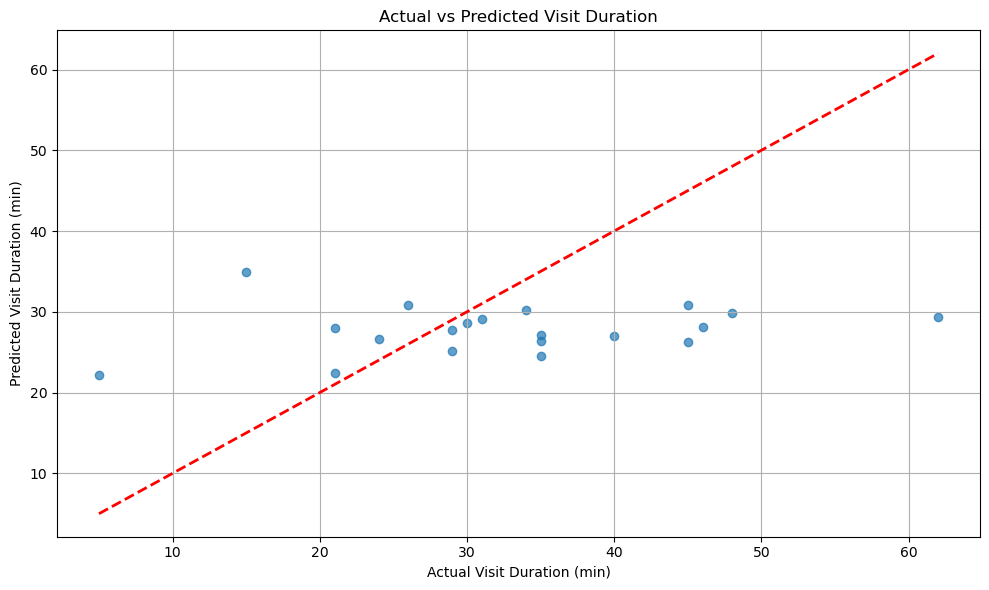

In [11]:
# 8. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Visit Duration (min)")
plt.ylabel("Predicted Visit Duration (min)")
plt.title("Actual vs Predicted Visit Duration")
plt.grid(True)
plt.tight_layout()
plt.show()